In [8]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.6/376.0 MB 10.5 MB/s eta 0:00:36
   ---------------------------------------- 3.9/376.0 MB 11.2 MB/s eta 0:00:34
    --------------------------------------- 6.0/376.0 MB 10.8 MB/s eta 0:00:35
    --------------------------------------- 7.6/376.0 MB 10.0 MB/s eta 0:00:37
    --------------------------------------- 9.2/376.0 MB 9.3 MB/s eta 0:00:40
   - -------------------------------------- 11.3/376.0 MB 9.5 MB/s eta 0:00:39
   - -------------------------------------- 13.4/376.0 MB 9.5 MB/s eta 0:00:39
   - -------------------------------------- 15.5/376.0 MB 9.6 MB/s eta 0:00:38
   - -------------------------------------- 17.8/376.0 MB 9.8 MB/s eta 0:00:37
   -- ------------------------------------- 20.2/376.0 MB 9.9 MB/s eta 0:00:37
   -- ------------------------------------- 22.3/376.0 MB 10.0 MB/s eta 0:00:36
   -- ------------------------------------- 24.9/376.0 MB 10

In [10]:
data_dir = r"C:\Users\ASUS\Downloads\archive (1)\brain_tumor_dataset"

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='int',
    image_size=(128, 128),
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=42
)

Found 253 files belonging to 2 classes.
Using 203 files for training.
Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [13]:
# Check class names (labels inferred from folder names)

class_names = train_ds.class_names
print("Class names:", class_names)

Class names: ['no', 'yes']


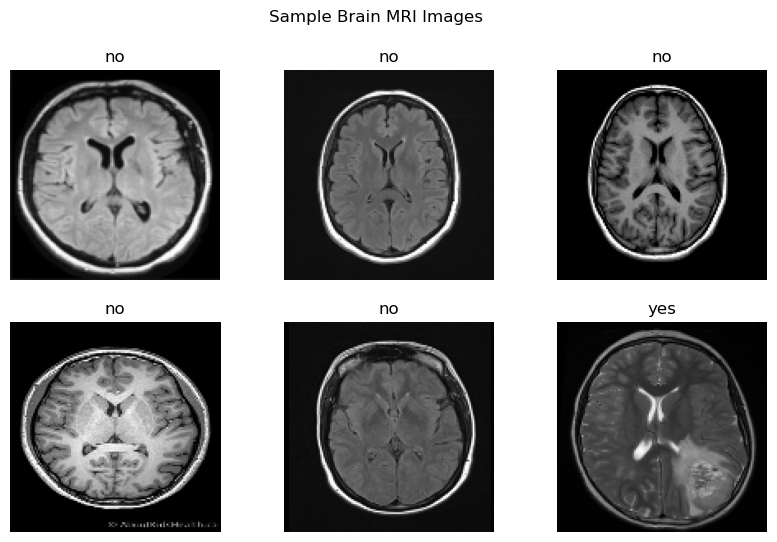

In [17]:
# Plot sample images from training data

plt.figure(figsize=(10, 6))
for images, labels in train_ds.take(1):
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.suptitle("Sample Brain MRI Images")
plt.show()

In [19]:
# Improve Performance

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [23]:
# Define the CNN Model

model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),      
    layers.Rescaling(1./255),                # Normalize pixel values

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')   # Binary classification
])

In [27]:
# Compile the Model

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train the Model

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 394ms/step - accuracy: 0.6573 - loss: 0.6445 - val_accuracy: 0.7200 - val_loss: 0.5587
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 394ms/step - accuracy: 0.8010 - loss: 0.4879 - val_accuracy: 0.7400 - val_loss: 0.6554
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 404ms/step - accuracy: 0.7523 - loss: 0.5516 - val_accuracy: 0.7400 - val_loss: 0.5363
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 440ms/step - accuracy: 0.7899 - loss: 0.4742 - val_accuracy: 0.7400 - val_loss: 0.5377
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 406ms/step - accuracy: 0.8341 - loss: 0.4108 - val_accuracy: 0.8000 - val_loss: 0.5192
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 398ms/step - accuracy: 0.8543 - loss: 0.3860 - val_accuracy: 0.8000 - val_loss: 0.5238
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 395ms/step - accuracy: 0.8259 - loss: 0.3465 - val_accuracy: 0.7200 - val_loss: 0.5085
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 345ms/step - accuracy: 0.8632 - loss: 0.3357 - val_accuracy: 0.7800 - val_loss:

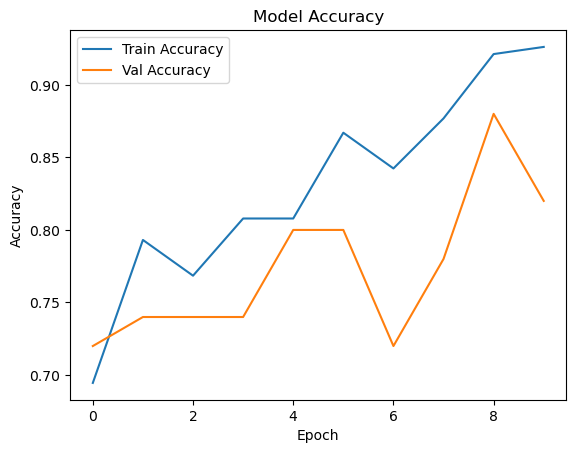

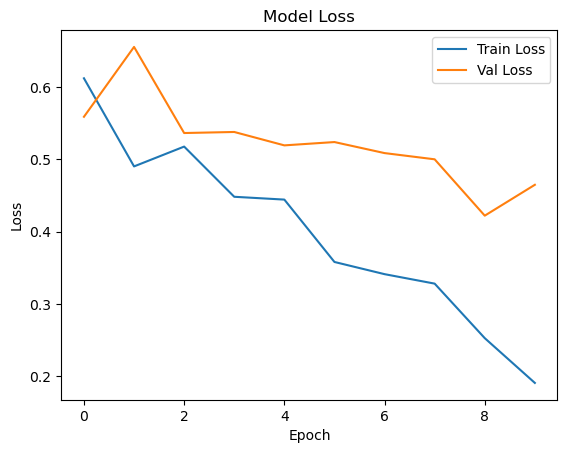

In [33]:
# Plot Accuracy and Loss Curves

import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()